In [3]:
#Carga y exploración de datos
import pandas as pd
import numpy as np

data = pd.read_csv(r'C:\Portafolio_dudo\m7\ev_final\dataset_generos_musicales.csv')
print(data)
print(data.info())
print(data.describe())
print(data.columns)

df = data.copy()

       País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0     Chile   71    22       79           61       70    58        79     69
1      EEUU   34    41       40           79       74    37        90     23
2    México   91    72       52           99       83    23        63     21
3     Corea   80    21       95           34       22    79        27     25
4     Japón   40    49       77           81       70    33        66     73
5  Alemania   94    57       41           81       26    28        54     23
6     Rusia   94    21       68           66       40    72        97     73
7    Italia   43    83       78           81       92    21        55     82
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         8 non-null      object
 1   Pop          8 non-null      int64 
 2   Rock         8 non-null      int64 
 3

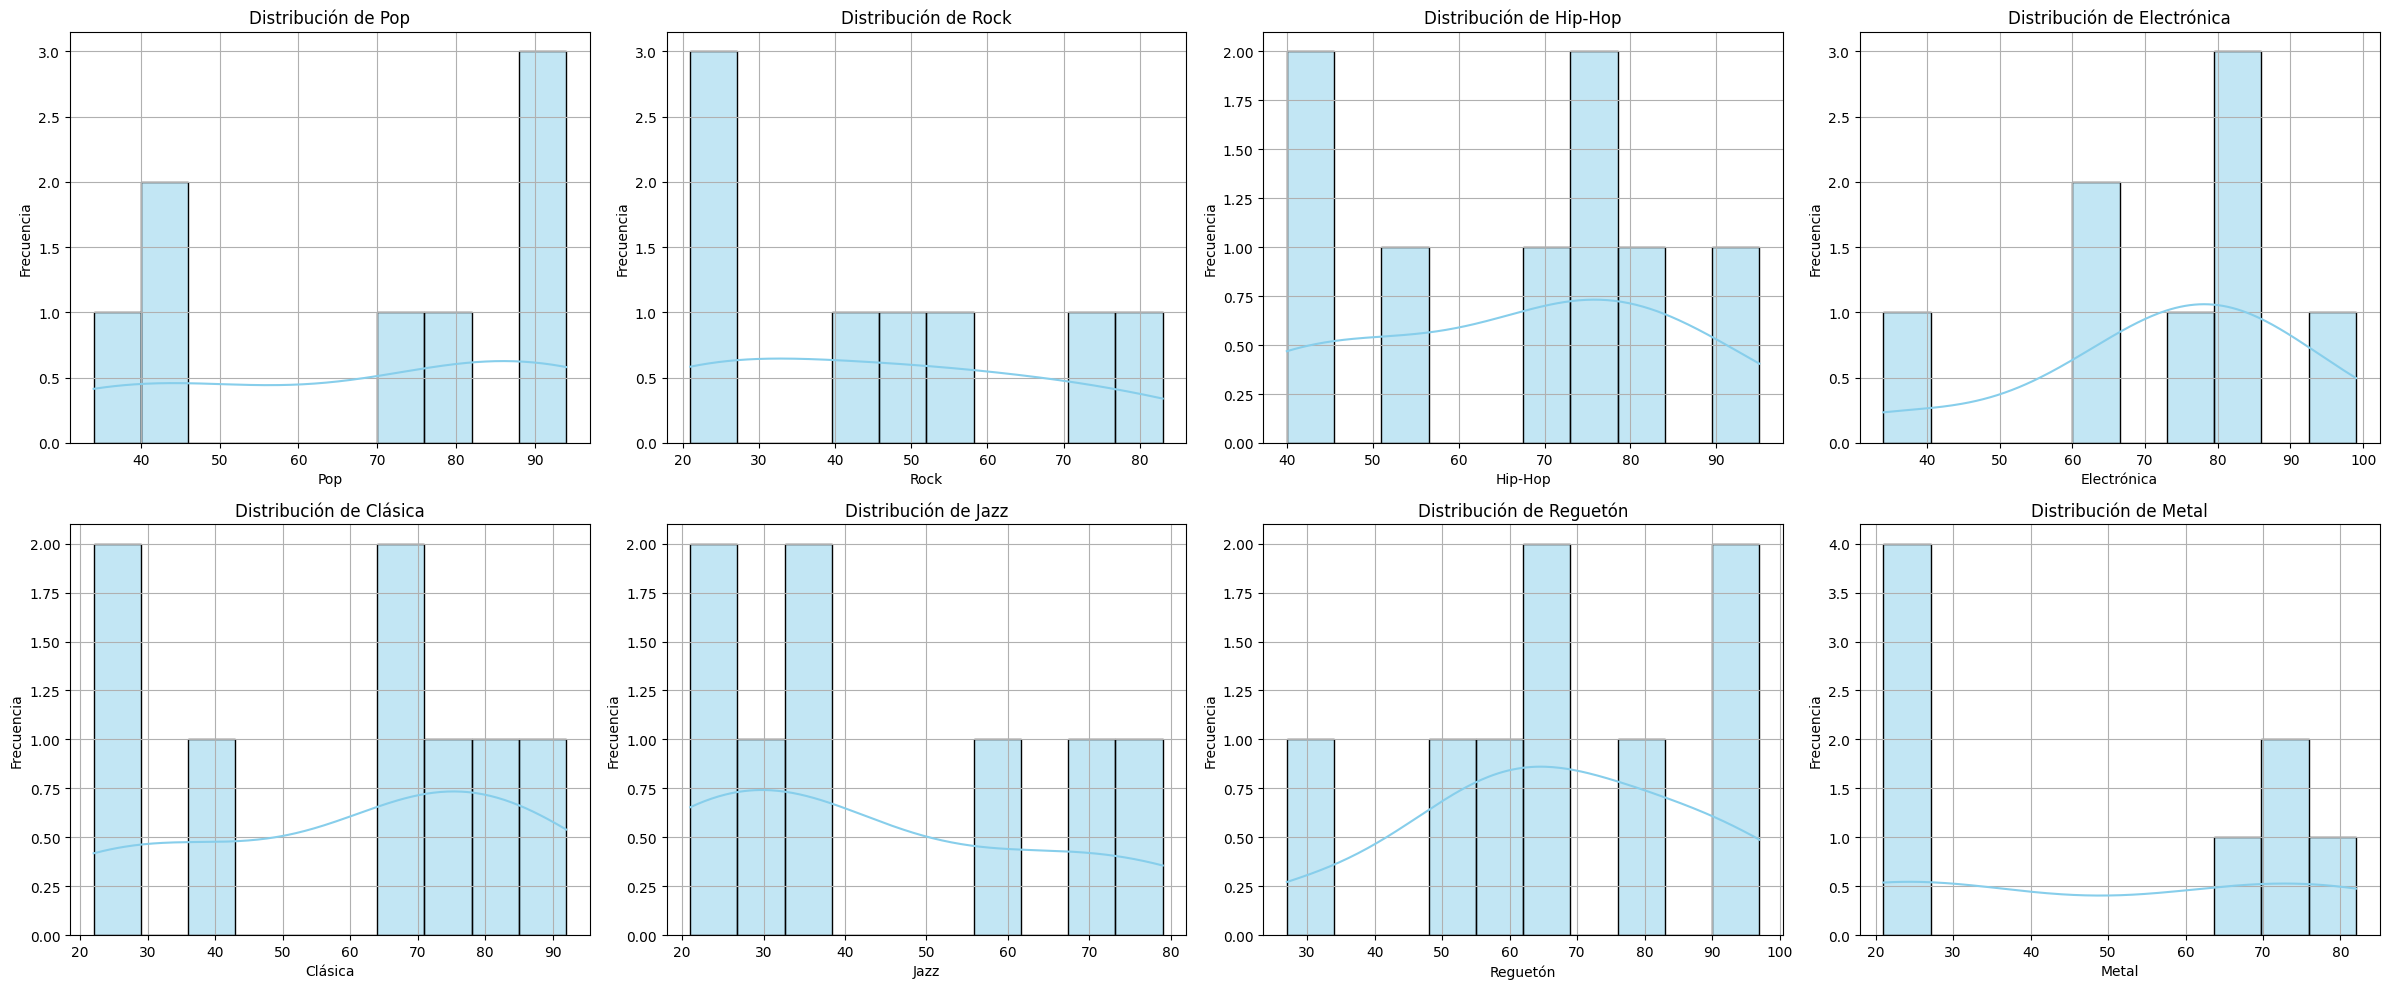

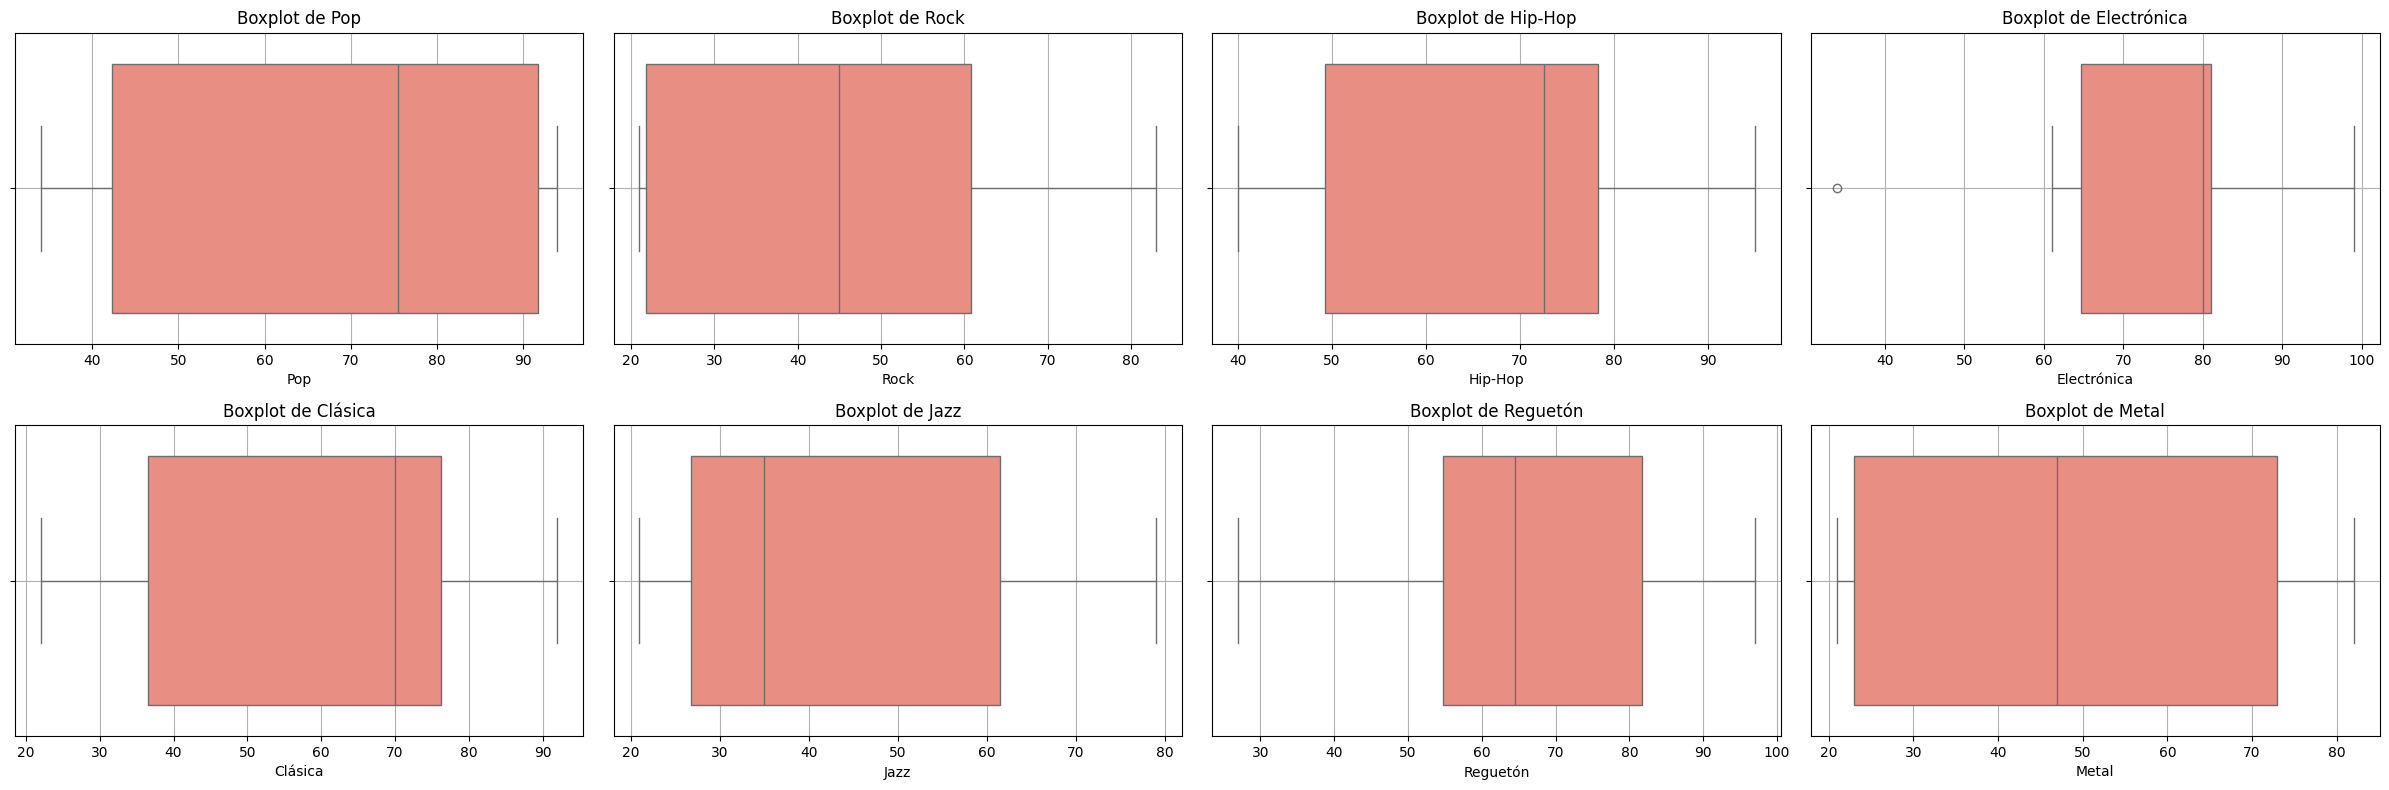

In [4]:
# Visualización de datos (Distribución y outliers)
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
variables = ['Pop', 'Rock', 'Hip-Hop', 'Electrónica', 'Clásica', 'Jazz', 'Reguetón', 'Metal']

# Distribucion de las variables numéricas
fig, axes = plt.subplots(2, 4, figsize=(24, 10))
for i, var in enumerate(variables):
    ax = axes[i // 4, i % 4]
    sns.histplot(df[var], kde=True, bins=10, color="skyblue", ax=ax)
    ax.set_title(f"Distribución de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Frecuencia")
    ax.grid(True)
plt.tight_layout()
plt.show()

# Boxplots de las variables numéricas (outliers)
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
for i, var in enumerate(variables):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=df[var], color="salmon", ax=ax)
    ax.set_title(f"Boxplot de {var}")
    ax.set_xlabel(var)
    ax.grid(True)
plt.tight_layout()
plt.show()

Los gráficos muestran que las preferencias por género musical varían notablemente entre países. Los histogramas evidencian distribuciones diferentes para cada género, algunas más concentradas y otras más dispersas. Los boxplots permiten identificar outliers y comparar la mediana y la variabilidad de cada género, mostrando que ciertos géneros tienen preferencias más homogéneas y otros más variadas entre los países.

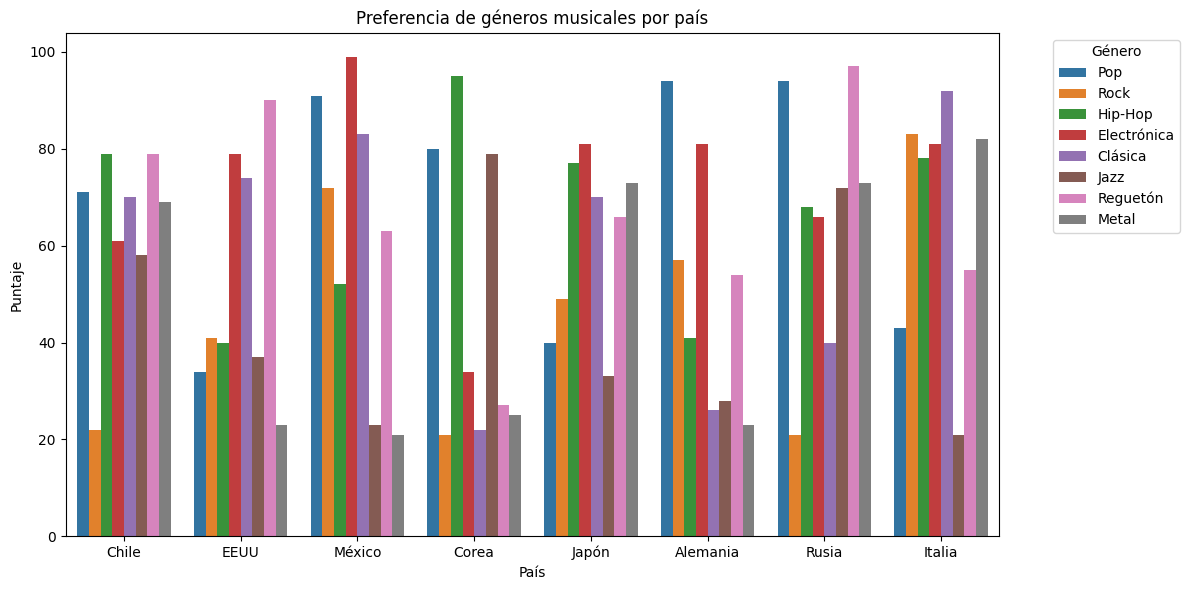

In [5]:
# Gráfico de barras: países vs géneros musicales
df_melt = df.melt(id_vars="País", value_vars=variables, var_name="Género", value_name="Puntaje")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melt, x="País", y="Puntaje", hue="Género")
plt.title("Preferencia de géneros musicales por país")
plt.xlabel("País")
plt.ylabel("Puntaje")
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\dschu\AppData\Local\Temp\ipykernel_22896\2525013016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="País", y=var, ax=ax, palette="Set2")
C:\Users\dschu\AppData\Local\Temp\ipykernel_22896\2525013016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="País", y=var, ax=ax, palette="Set2")
C:\Users\dschu\AppData\Local\Temp\ipykernel_22896\2525013016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="País", y=var, ax=ax, palette="Set2")
C:\Users\dschu\AppData\Local\Temp\ipykernel_22896\2525013016.

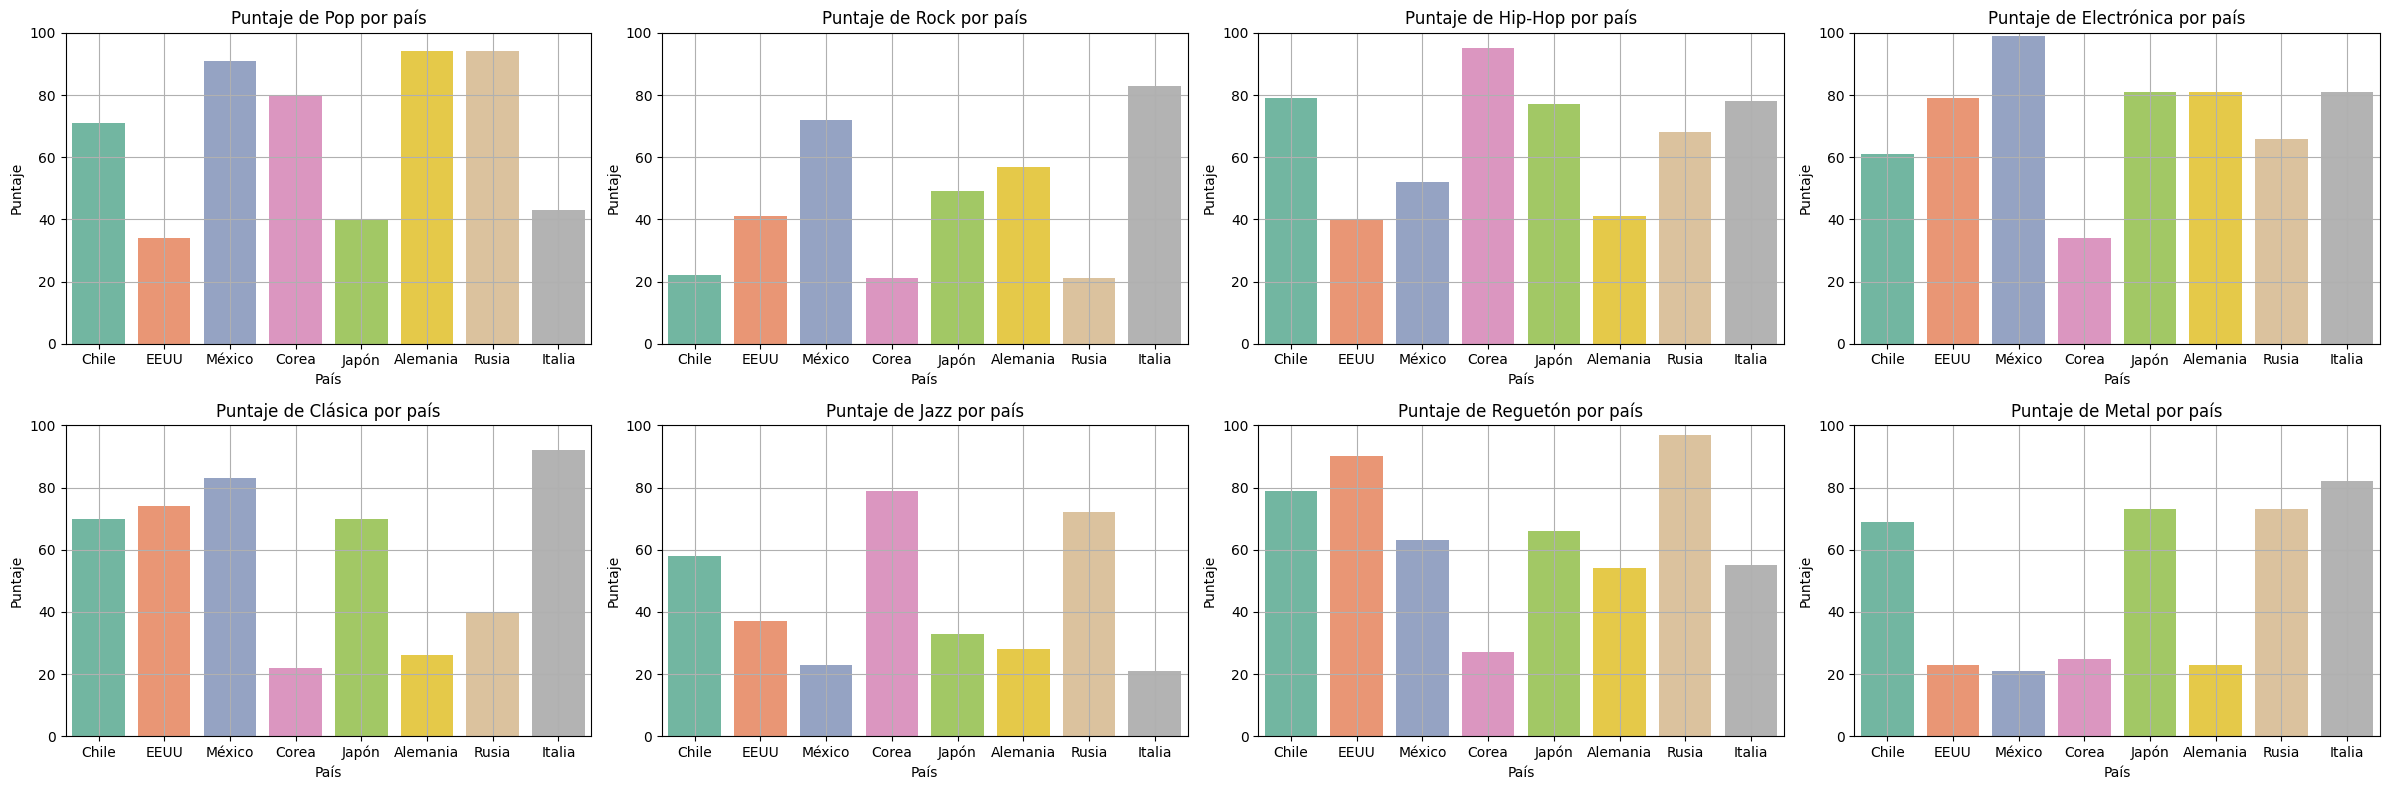

In [6]:
# Gráfico de barras individuales por género para todos los países
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
for i, var in enumerate(variables):
    ax = axes[i // 4, i % 4]
    sns.barplot(data=df, x="País", y=var, ax=ax, palette="Set2")
    ax.set_title(f"Puntaje de {var} por país")
    ax.set_xlabel("País")
    ax.set_ylabel("Puntaje")
    ax.set_ylim(0, 100)
    ax.grid(True)
plt.tight_layout()
plt.show()

Del gráfico "Preferencia de géneros musicales por país" se pueden extraer las siguientes conclusiones:

- Existen diferencias claras en la preferencia de géneros musicales entre países.
- Por ejemplo, México y Alemania muestran una alta preferencia por el Pop, mientras que Corea destaca en Hip-Hop y Jazz.
- Reguetón es especialmente popular en Rusia, EEUU y Chile.
- Italia tiene una alta puntuación en Clásica y Metal, lo que indica una preferencia por estos géneros.
- Algunos países, como Japón y EEUU, presentan preferencias más equilibradas entre varios géneros.
- En general, se observa que cada país tiene uno o dos géneros predominantes, reflejando diferencias culturales en los gustos musicales.

In [7]:
from sklearn.preprocessing import StandardScaler

# Variables numéricas (géneros musicales)
X = df.drop(columns=["País"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K inicial
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
labels_k3 = kmeans.labels_

# Silhouette
score_k3 = silhouette_score(X_scaled, labels_k3)
print("Silhouette Score (K=3):", round(score_k3, 3))

# Asignar clusters al dataframe
df["Cluster_K3"] = labels_k3




Silhouette Score (K=3): 0.221


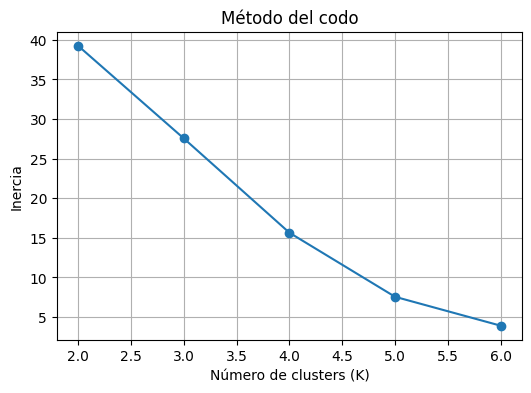

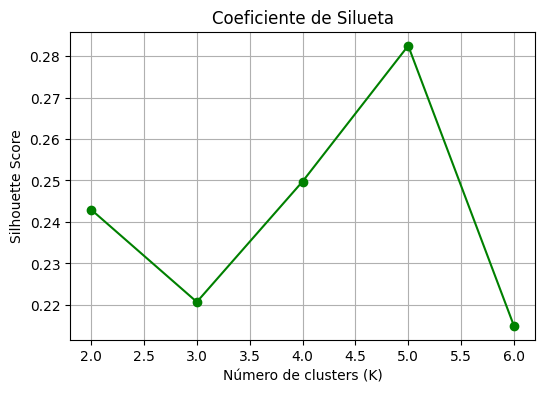

In [8]:
import matplotlib.pyplot as plt

inertia = []
silhouette = []
K_range = range(2, 7)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

# Gráfico del codo
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker="o")
plt.title("Método del codo")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Gráfico de Silhouette
plt.figure(figsize=(6, 4))
plt.plot(K_range, silhouette, marker="o", color="green")
plt.title("Coeficiente de Silueta")
plt.xlabel("Número de clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

El k optimo según lo observado es k=5 donde la inercia deja de disminuir significativamente (codo) y el silhouette score es máximo.

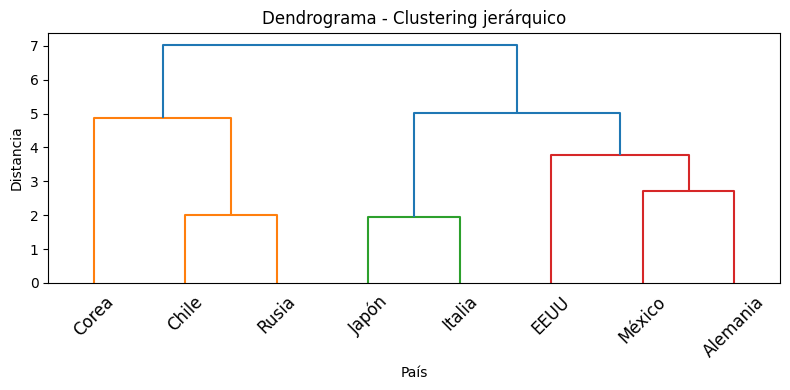

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Dendrograma
plt.figure(figsize=(8, 4))
dendrogram = sch.dendrogram(
    sch.linkage(X_scaled, method="ward"),
    labels=df["País"].values,
    leaf_rotation=45
)
plt.title("Dendrograma - Clustering jerárquico")
plt.xlabel("País")
plt.ylabel("Distancia")
plt.tight_layout()
plt.show()

Observa el punto donde el dendrograma tiene el mayor salto vertical sin cruzar ramas. Ese corte sugiere el número óptimo de clusters. En este caso, probablemente 3 o 4 clusters sean adecuados. (donde la distancia euclidiana es 5)

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Usamos 5 clusters para comparar con K-Means (ya que k=5 es óptimo según análisis previo)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
labels_k5 = kmeans.labels_
df["Cluster_K5"] = labels_k5

# Usamos 5 clusters para comparar con K-Means
hc = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
df["Cluster_HC"] = hc.fit_predict(X_scaled)

# Comparación con K-Means
print("\n📊 Comparación de asignación de clusters:")
print(df[["País", "Cluster_K5", "Cluster_HC"]])


📊 Comparación de asignación de clusters:
       País  Cluster_K5  Cluster_HC
0     Chile           2           1
1      EEUU           4           4
2    México           0           0
3     Corea           3           3
4     Japón           1           2
5  Alemania           0           0
6     Rusia           2           1
7    Italia           1           2


In [11]:
# Tabla cruzada para ver coincidencias y diferencias
tabla_cruzada = pd.crosstab(df["Cluster_K5"], df["Cluster_HC"])
print("\nTabla cruzada de asignaciones:")
print(tabla_cruzada)


Tabla cruzada de asignaciones:
Cluster_HC  0  1  2  3  4
Cluster_K5               
0           2  0  0  0  0
1           0  0  2  0  0
2           0  2  0  0  0
3           0  0  0  1  0
4           0  0  0  0  1


La tabla cruzada muestra que, aunque hay coincidencias entre los clusters asignados por K-Means y Clustering Jerárquico, existen diferencias en la agrupación de algunos países. Esto indica que ambos métodos identifican patrones similares en algunos casos, pero también presentan discrepancias en la estructura de los grupos.

In [12]:
from sklearn.cluster import DBSCAN

# Prueba 1: eps=1.5, min_samples=2
dbscan1 = DBSCAN(eps=1.5, min_samples=2)
df["Cluster_DBSCAN_1"] = dbscan1.fit_predict(X_scaled)

# Prueba 2: eps=2.0, min_samples=2
dbscan2 = DBSCAN(eps=2.0, min_samples=2)
df["Cluster_DBSCAN_2"] = dbscan2.fit_predict(X_scaled)

# Prueba 3: eps=2.5, min_samples=3
dbscan3 = DBSCAN(eps=2.5, min_samples=3)
df["Cluster_DBSCAN_3"] = dbscan3.fit_predict(X_scaled)

# Conteo de agrupaciones
print("\n🔍 DBSCAN (eps=1.5):", df["Cluster_DBSCAN_1"].value_counts())
print("🔍 DBSCAN (eps=2.0):", df["Cluster_DBSCAN_2"].value_counts())
print("🔍 DBSCAN (eps=2.5):", df["Cluster_DBSCAN_3"].value_counts())


🔍 DBSCAN (eps=1.5): Cluster_DBSCAN_1
-1    8
Name: count, dtype: int64
🔍 DBSCAN (eps=2.0): Cluster_DBSCAN_2
-1    6
 0    2
Name: count, dtype: int64
🔍 DBSCAN (eps=2.5): Cluster_DBSCAN_3
 0    4
-1    4
Name: count, dtype: int64


🧠 Justificación de parámetros
- eps define el radio de vecindad: valores bajos detectan grupos compactos, valores altos agrupan más países.
- min_samples=2 (numero minimo de puntos para conformar un cluster) es razonable para un dataset pequeño (8 países).
- DBSCAN puede identificar formas no esféricas y ruido (etiquetado como -1)

✅ Análisis comparativo
- K-Means y clustering jerárquico tienden a formar grupos más estructurados y comparables.
- DBSCAN puede detectar países atípicos o con perfiles musicales únicos (si aparecen como -1).
- Si DBSCAN forma pocos clusters o muchos puntos como ruido, puede no ser el mejor método para este dataset tan pequeño y denso.

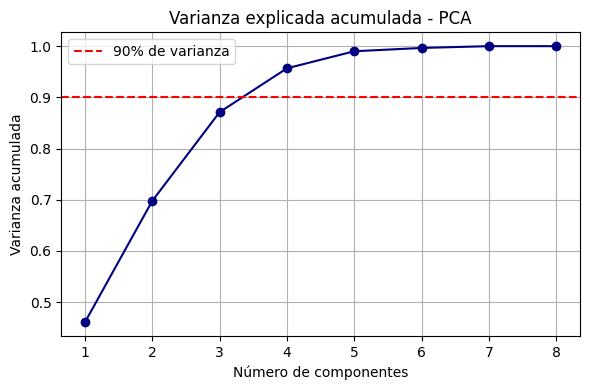

📊 Componentes necesarios para explicar ≥90% de la varianza: 4


In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
varianza = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza)

# Gráfico de varianza acumulada
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(varianza_acumulada)+1), varianza_acumulada, marker="o", color="navy")
plt.axhline(y=0.9, color="red", linestyle="--", label="90% de varianza")
plt.title("Varianza explicada acumulada - PCA")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza acumulada")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Determinar cuántos componentes explican al menos el 90%
n_componentes_90 = np.argmax(varianza_acumulada >= 0.9) + 1
print(f"📊 Componentes necesarios para explicar ≥90% de la varianza: {n_componentes_90}")

3 componentes explican aproximadamente el 90% de la varianza

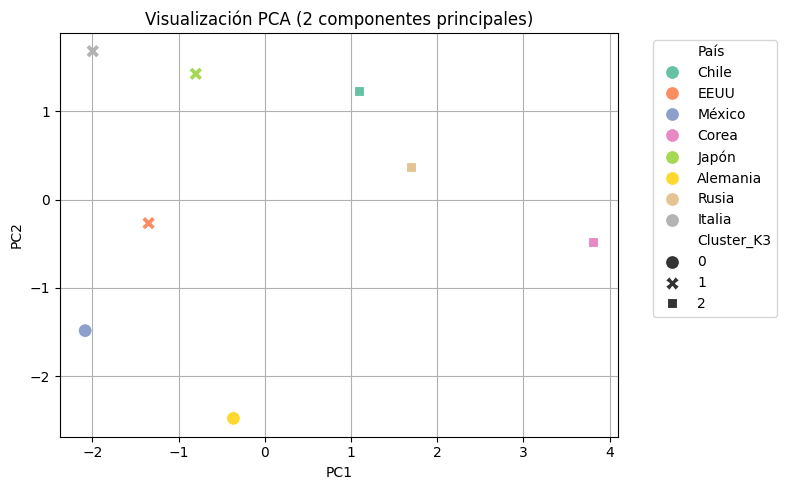

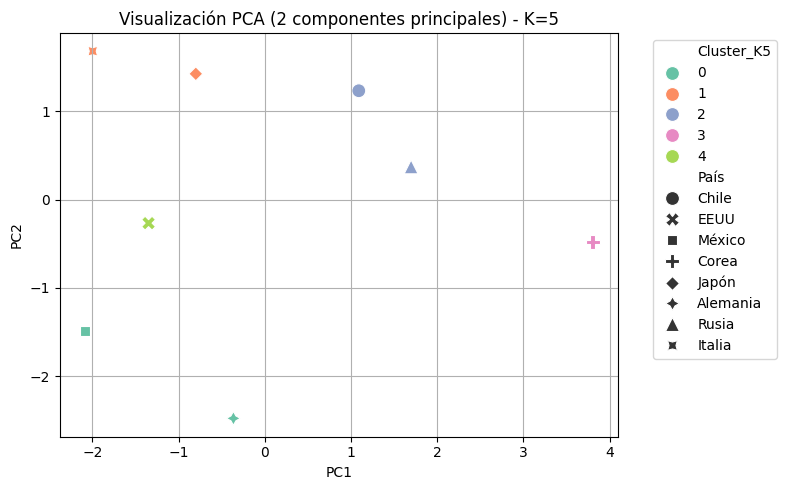

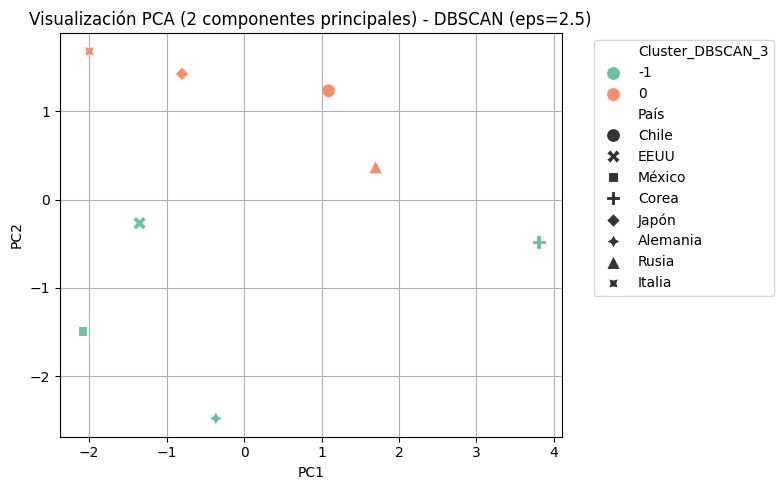

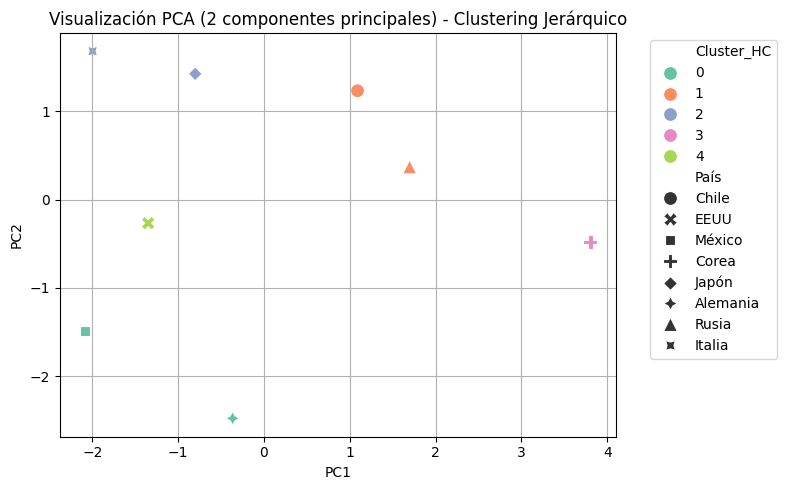

In [14]:
# Visualización PCA con 2 componentes principales
df_pca = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
df_pca["País"] = df["País"]
df_pca["Cluster_K3"] = df["Cluster_K3"]

# Gráfico para K=3
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="País", style="Cluster_K3", palette="Set2", s=100)
plt.title("Visualización PCA (2 componentes principales)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafico para K=5
df_pca["Cluster_K5"] = df["Cluster_K5"]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_K5", style="País", palette="Set2", s=100)
plt.title("Visualización PCA (2 componentes principales) - K=5")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# Grafico para dbscan eps=2.5
df_pca["Cluster_DBSCAN_3"] = df["Cluster_DBSCAN_3"]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_DBSCAN_3", style="País", palette="Set2", s=100)
plt.title("Visualización PCA (2 componentes principales) - DBSCAN (eps=2.5)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

#Grafico para clustering jerarquico
df_pca["Cluster_HC"] = df["Cluster_HC"]
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster_HC", style="País", palette="Set2", s=100)
plt.title("Visualización PCA (2 componentes principales) - Clustering Jerárquico")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

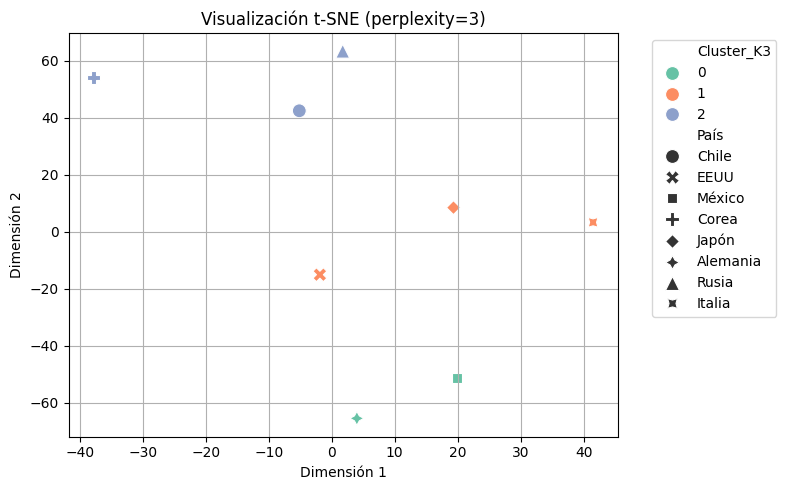

In [15]:
from sklearn.manifold import TSNE

# Aplicar t-SNE con perplexity=3
tsne = TSNE(n_components=2, perplexity=3, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# DataFrame para graficar
df_tsne = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
df_tsne["País"] = df["País"]
df_tsne["Cluster_K3"] = df["Cluster_K3"]

# Gráfico
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_tsne, x="Dim1", y="Dim2", hue="Cluster_K3", style="País", palette="Set2", s=100)
plt.title("Visualización t-SNE (perplexity=3)")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

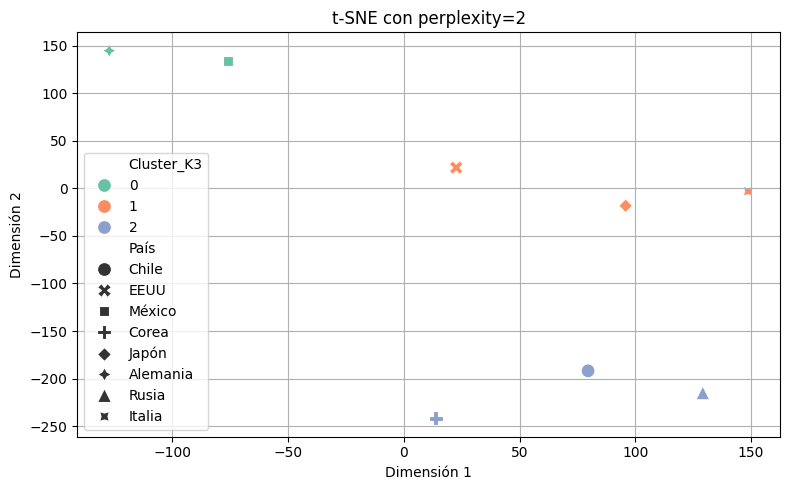

In [16]:
# Ejemplo con perplexity=2
tsne_alt = TSNE(n_components=2, perplexity=2, random_state=42)
X_tsne_alt = tsne_alt.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_alt[:, 0], y=X_tsne_alt[:, 1], hue=df["Cluster_K3"], style=df["País"], palette="Set2", s=100)
plt.title("t-SNE con perplexity=2")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.tight_layout()
plt.show()

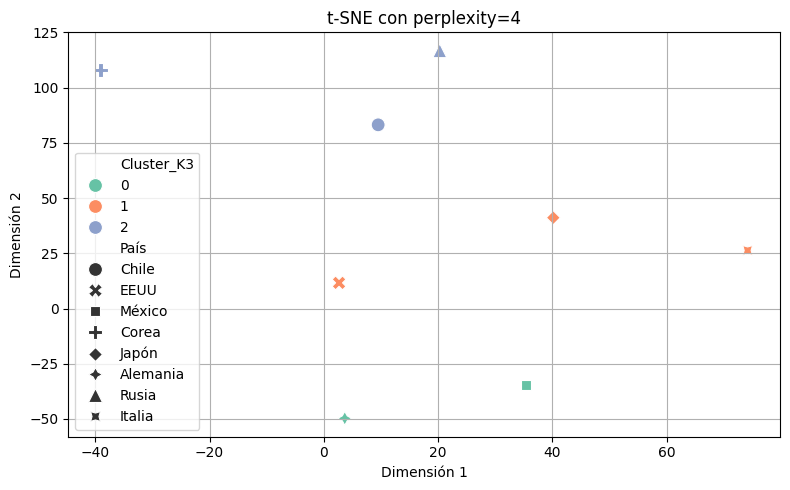

In [17]:
# Ejemplo con perplexity=4
tsne_alt = TSNE(n_components=2, perplexity=4, random_state=42)
X_tsne_alt = tsne_alt.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_alt[:, 0], y=X_tsne_alt[:, 1], hue=df["Cluster_K3"], style=df["País"], palette="Set2", s=100)
plt.title("t-SNE con perplexity=4")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.tight_layout()
plt.show()


Diferencias entre K-Means, Clustering Jerárquico y DBSCAN

K-Means:
Asume que los clusters son esféricos y de tamaño similar.
Requiere definir el número de clusters (K) antes de ejecutar.
Es sensible a outliers y a la escala de los datos.
Asigna cada punto a un único cluster.

Clustering Jerárquico (Agglomerative):
No requiere definir el número de clusters de antemano (puedes elegir el corte en el dendrograma).
Construye una jerarquía de agrupamientos (árbol/dendrograma).
Puede capturar relaciones jerárquicas y es útil para visualizar la estructura de los datos.
Menos sensible a la inicialización que K-Means.

DBSCAN:
No requiere especificar el número de clusters.
Detecta clusters de cualquier forma y puede identificar puntos como “ruido” (outliers).
Depende de los parámetros eps (radio de vecindad) y min_samples.
Es ideal para datos con clusters de densidad variable y presencia de outliers.

¿Cuál funcionó mejor en este caso y por qué?
K-Means y clustering jerárquico formaron grupos estructurados y comparables, lo que es adecuado para un dataset pequeño y homogéneo como este.

DBSCAN identificó pocos clusters y, dependiendo de los parámetros, puede marcar países como ruido o no agrupar bien debido a la baja cantidad de datos.

Conclusión:
K-Means y clustering jerárquico funcionaron mejor porque el dataset es pequeño, denso y los clusters son relativamente compactos. DBSCAN es más útil cuando hay outliers o clusters de formas irregulares, lo cual no es tan evidente aquí.
Comparación de PCA y t-SNE

PCA (Análisis de Componentes Principales)
Es una técnica lineal que proyecta los datos en nuevas dimensiones maximizando la varianza.
Permite interpretar fácilmente la importancia de cada componente.
Es útil para reducción de dimensionalidad y visualización general de la estructura global.

t-SNE
Es una técnica no lineal que preserva mejor las relaciones locales (vecindad) entre puntos.
Es ideal para visualizar agrupamientos y separaciones en datasets pequeños.
No es interpretable en términos de varianza explicada, pero suele mostrar mejor la separación entre grupos.

¿Cuál visualizó mejor la relación entre países?

t-SNE permitió visualizar de manera más clara la separación y agrupamiento de los países según sus perfiles musicales, mostrando mejor los clusters formados por K-Means.

PCA mostró la estructura global, pero puede superponer puntos si la separación no es lineal.

Conclusión:
t-SNE permitió una visualización más clara y detallada de la relación entre los países en función de sus géneros musicales.

Relacionando los resultados del análisis con tendencias globales en consumo musical

Observaciones basadas en los clusters y visualizaciones:
- El Pop y el Reguetón muestran alta popularidad en varios países, lo que coincide con tendencias globales donde estos géneros dominan los rankings internacionales y plataformas de streaming.
- El Hip-Hop y la Electrónica también tienen presencia significativa, reflejando el crecimiento de estos géneros en mercados como EEUU, Corea y Europa.
- La preferencia por géneros como Clásica y Jazz es más marcada en países específicos, lo que concuerda con audiencias de nicho y tradiciones culturales.
- El Metal, aunque minoritario globalmente, tiene focos de alta preferencia en países como Italia y Japón, alineado con comunidades fieles en ciertos mercados.
- La agrupación de países en clusters similares sugiere que la globalización y el acceso digital han homogeneizado parte de los gustos musicales, pero aún existen diferencias culturales notables.

Los resultados del clustering y la reducción de dimensionalidad reflejan tendencias globales en el consumo musical: géneros como Pop, Reguetón, Hip-Hop y Electrónica dominan en la mayoría de los países, en línea con los rankings de plataformas como Spotify y YouTube. Sin embargo, la existencia de clusters diferenciados y la preferencia por géneros como Clásica, Jazz o Metal en ciertos países muestran que las tradiciones culturales y los nichos musicales siguen siendo relevantes. Esto evidencia tanto la globalización de la música como la persistencia de identidades musicales locales. 